In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import theano.tensor as tt

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# Generate some toy data
np.random.seed(0)
x = np.linspace(0, 1, num=50)
y = 2 * x + np.random.normal(0, 0.1, size=50)

In [5]:
# Define the model
with pm.Model() as model:
    alpha = pm.Normal("alpha", mu=0, sd=1)
    beta = pm.Normal("beta", mu=0, sd=1)
    sigma = pm.HalfNormal("sigma", sd=1)
    y_pred = pm.Normal("y_pred", mu=alpha + beta * x, sd=sigma, shape=y.shape)
    likelihood = pm.Normal("y", mu=y_pred, sd=sigma, observed=y)
    trace = pm.sample(1000, tune=1000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [y_pred, sigma, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 37 seconds.


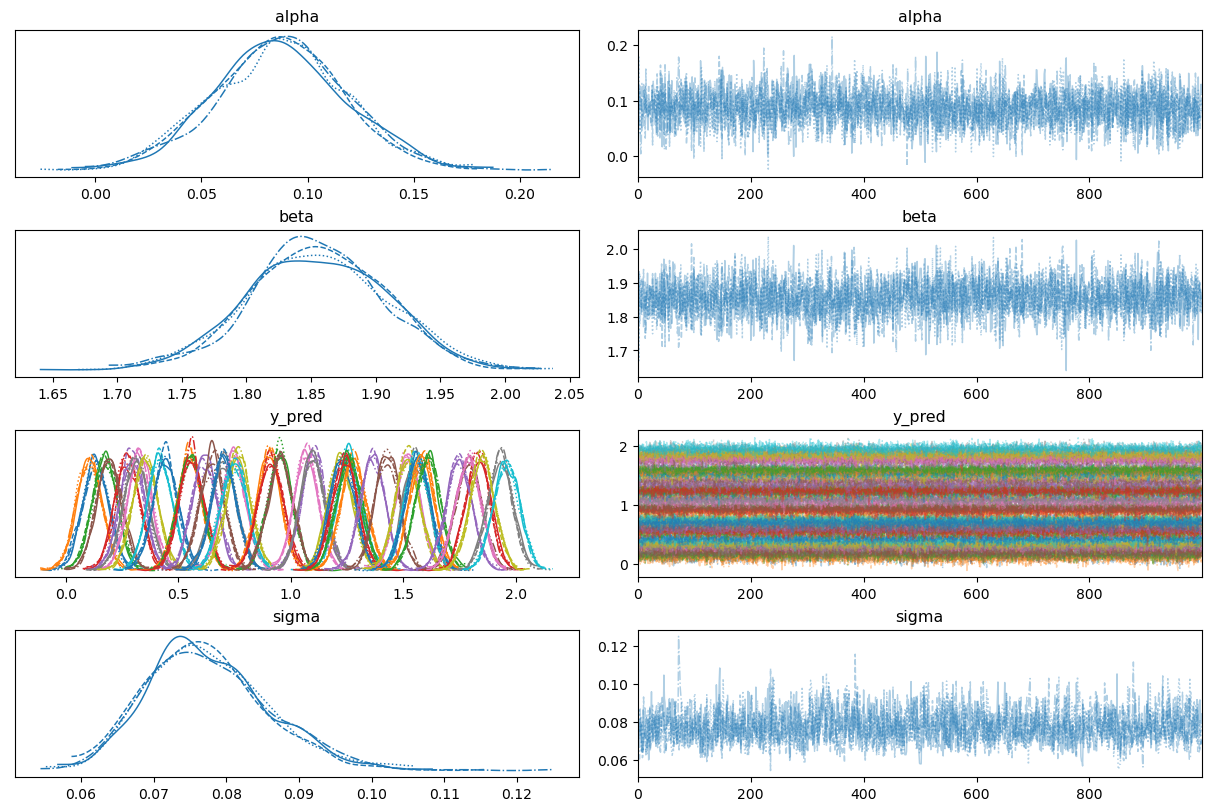

In [27]:
import arviz
# Plot the results
arviz.plot_trace(trace)
plt.show()

In [7]:
# Perform posterior predictive sampling
ppc = pm.sample_posterior_predictive(trace, samples=2000, model=model)

In [13]:
with model:
    post_pred = pm.sample_posterior_predictive(trace.posterior)
# add posterior predictive to the InferenceData
az.concat(trace, az.from_pymc3(posterior_predictive=post_pred), inplace=True)

C:\Users\Mfund\anaconda3\envs\pymc3_env\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


C:\Users\Mfund\anaconda3\envs\pymc3_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


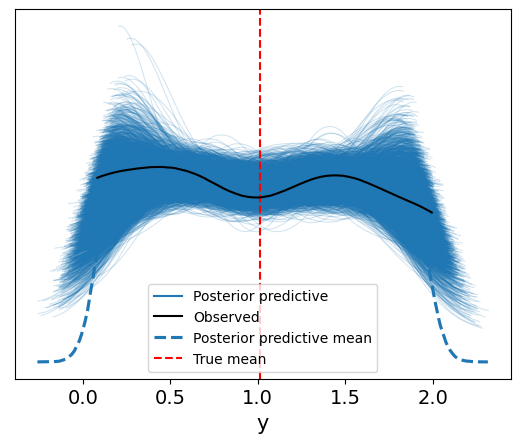

In [14]:
# Plot the posterior predictive checks
fig, ax = plt.subplots()
az.plot_ppc(trace, ax=ax)
ax.axvline(y.mean(), ls="--", color="r", label="True mean")
ax.legend(fontsize=10)
plt.show()

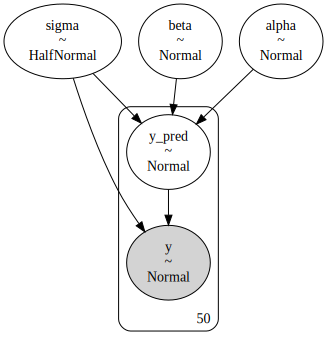

In [16]:
import arviz as az

pm.model_to_graphviz(model)

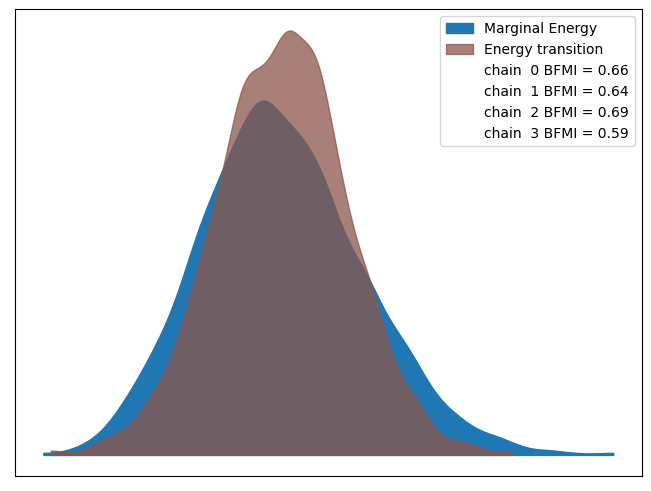

In [17]:
az.plot_energy(trace);

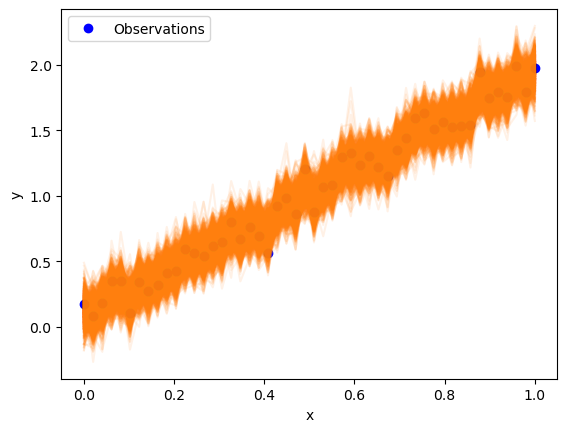

In [18]:
fig, ax = plt.subplots()
ax.plot(x, y, 'bo', label='Observations')
ax.plot(x, ppc['y'].T, 'C1-', alpha=0.1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc=0);

In [22]:
new_x = np.linspace(0, 1, num=50)
with model:
    # Generate posterior predictive samples
    post_pred = pm.sample_posterior_predictive(trace, samples=1000)

    # Take mean of predicted values for each new_x
    y_pred = post_pred["y"].mean(axis=0)

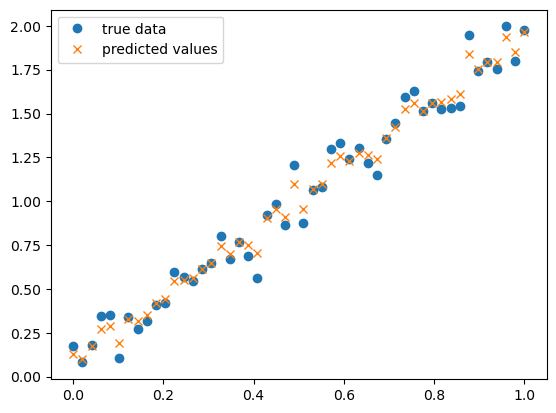

In [23]:
# Plot true data and predicted values
plt.plot(x, y, "o", label="true data")
plt.plot(new_x, y_pred, "x", label="predicted values")
plt.legend()
plt.show()

In [25]:
%reload_ext watermark
%watermark -n -u -v -iv -w -t

Last updated: Mon Mar 27 2023 08:07:24

Python implementation: CPython
Python version       : 3.10.9
IPython version      : 8.8.0

pymc3     : 3.11.4
numpy     : 1.23.5
arviz     : 0.11.2
theano    : 1.1.2
matplotlib: 3.6.2

Watermark: 2.3.1

